In [14]:
import pandas as pd
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/06_Stats/US_Baby_Names/US_Baby_Names_right.csv')

In [3]:
df

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41
5,11354,11355,Abigail,2004,F,AK,37
6,11355,11356,Olivia,2004,F,AK,33
7,11356,11357,Isabella,2004,F,AK,30
8,11357,11358,Alyssa,2004,F,AK,29
9,11358,11359,Sophia,2004,F,AK,28


In [4]:
df.head()

,Unnamed: 0,Id,Name,Year,Gender,State,Count
0,11349,11350,Emma,2004,F,AK,62
1,11350,11351,Madison,2004,F,AK,48
2,11351,11352,Hannah,2004,F,AK,46
3,11352,11353,Grace,2004,F,AK,44
4,11353,11354,Emily,2004,F,AK,41


In [6]:
del df["Unnamed: 0"]

In [7]:
df.head()

,Id,Name,Year,Gender,State,Count
0,11350,Emma,2004,F,AK,62
1,11351,Madison,2004,F,AK,48
2,11352,Hannah,2004,F,AK,46
3,11353,Grace,2004,F,AK,44
4,11354,Emily,2004,F,AK,41


In [11]:
df1 = df.groupby('Gender')

In [13]:
print(df1)

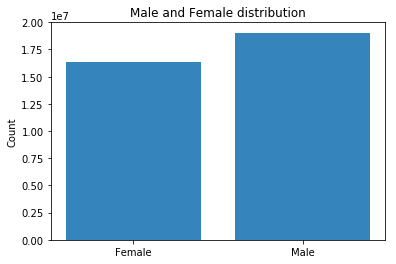

In [15]:
M_Count = df[df['Gender'] == 'M']['Count'].sum()
F_Count = df[df['Gender'] == 'F']['Count'].sum()
objects = ('Female','Male')
y_position = np.arange(len(objects))
performance = [F_Count,M_Count]
plt.bar(y_position,performance,align='center',alpha=0.9)
plt.xticks(y_position,objects)
plt.ylabel('Count')
plt.title('Male and Female distribution')
plt.show()

In [16]:
nameCount=df['Count'].groupby(df['Name'])
nameCount.sum().sort_values(ascending = False).head(5)

Name
Jacob       242874
Emma        214852
Michael     214405
Ethan       209277
Isabella    204798
Name: Count, dtype: int64

In [17]:
df1 = df.sort_values("Count")
med = int(df1['Id'].median())
s = df[df['Id'] == med]['Name']
l = s.tolist()
l[0]

'Kasey'

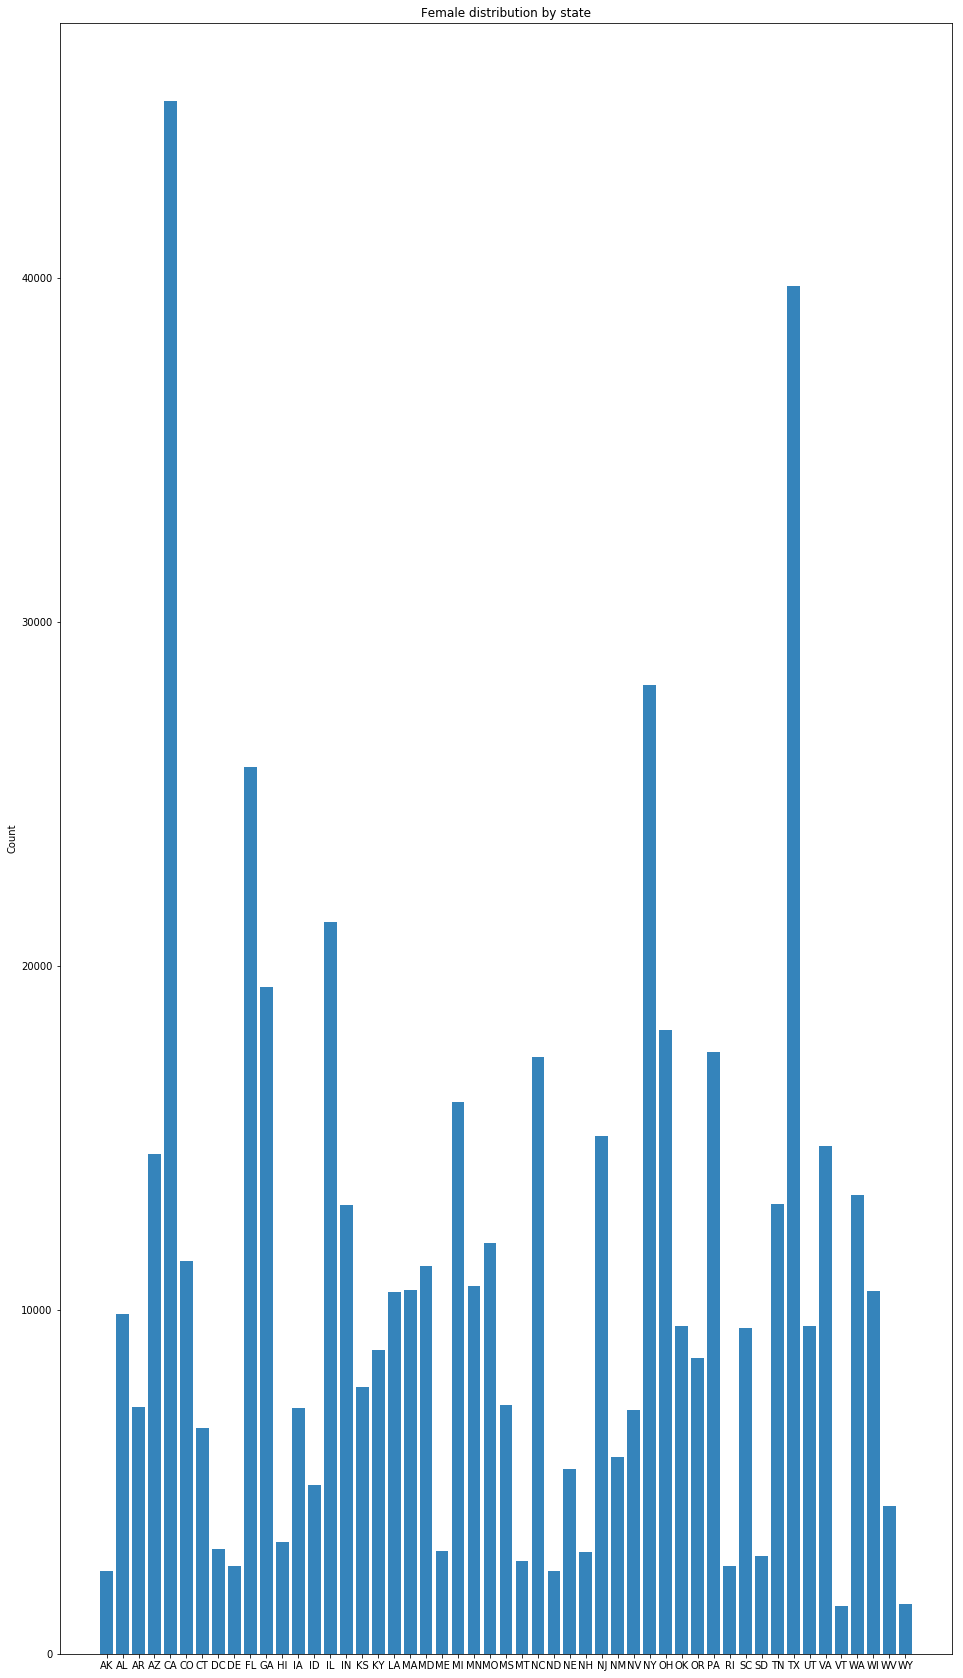

In [18]:
#Female distribution on Count
df_fem = df.loc[df['Gender'] == 'F']
cnt_fem = df_fem['Count'].groupby(df_fem['State']).count()
states_fem = df['State'].unique()
y_pos_fem = np.arange(len(states_fem))
plt.figure(figsize=(16,30))
perf_fem = cnt_fem
plt.bar(y_pos_fem,perf_fem,align='center',alpha=0.9)
plt.xticks(y_pos_fem,states_fem)
plt.ylabel('Count')
plt.title('Female distribution by state')
plt.show()

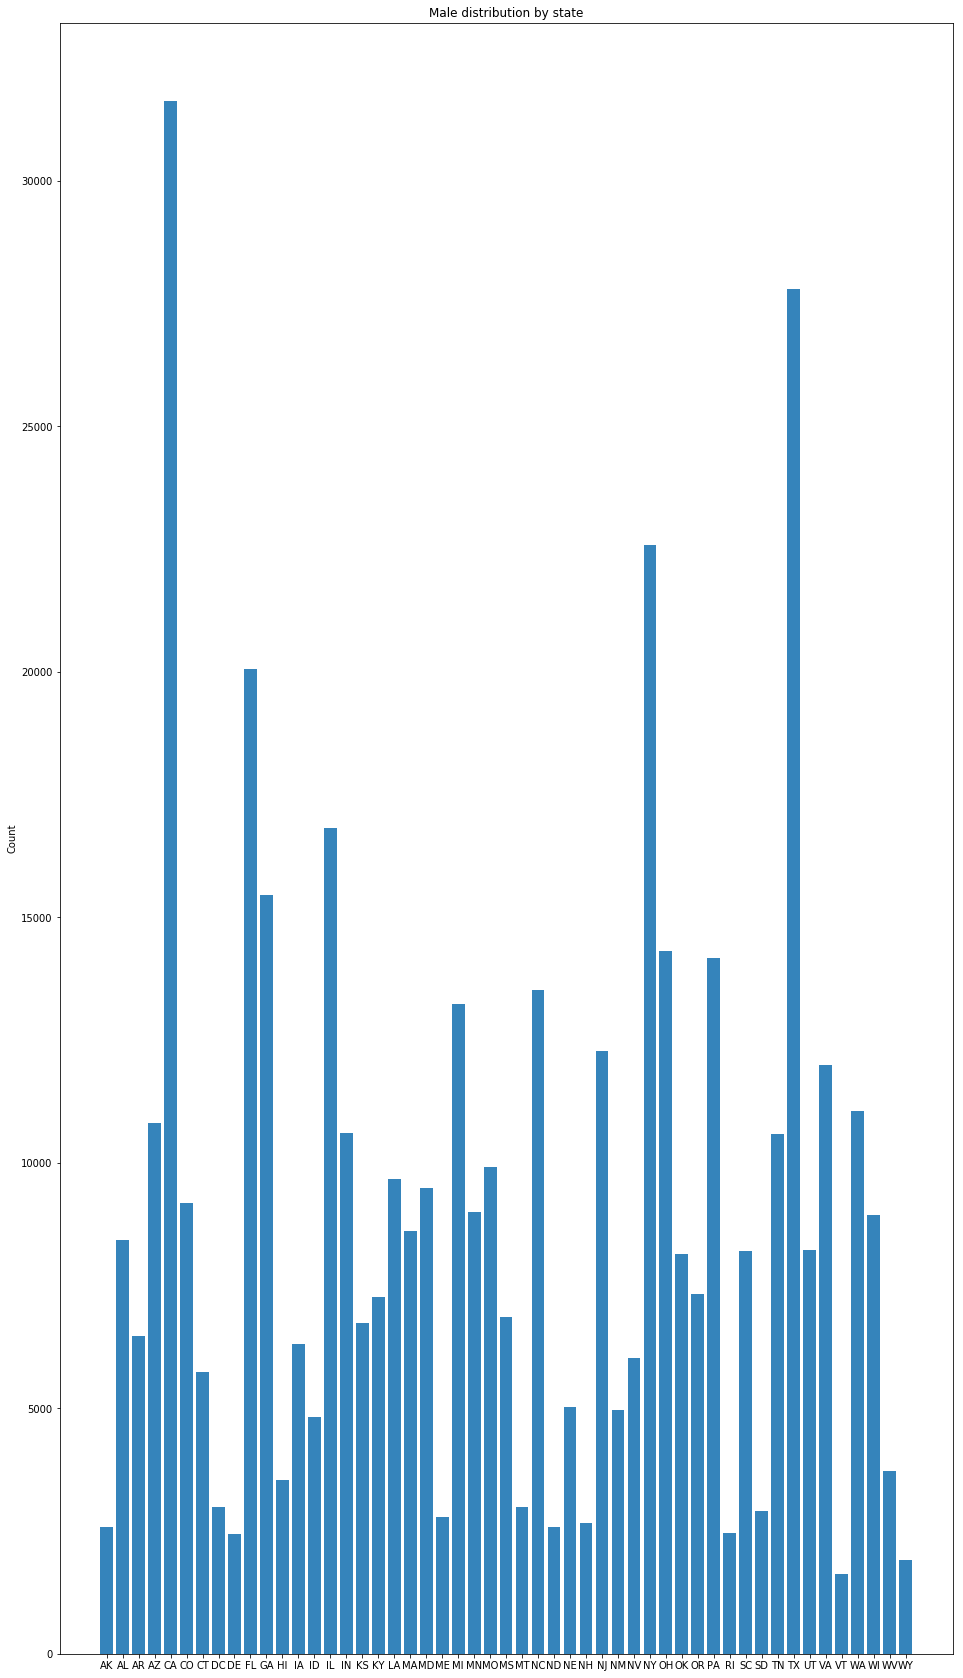

In [19]:
#Male distribution on Count
df_male = df.loc[df['Gender'] == 'M']
cnt_male = df_male['Count'].groupby(df_male['State']).count()
states_male = df['State'].unique()
y_pos_male = np.arange(len(states_male))
plt.figure(figsize=(16,30))
perf_male = cnt_male
plt.bar(y_pos_male,perf_male,align='center',alpha=0.9)
plt.xticks(y_pos_male,states_male)
plt.ylabel('Count')
plt.title('Male distribution by state')
plt.show()

In [20]:
# Maximum and minimum temprature data set
temp_max = np.array([39,41,43,47,49,51,45,38,37,29,27,25])
temp_min = np.array([21,23,27,28,32,35,31,28,21,19,17,18])

months = np.arange(12)

#Fitting to periodic function
def yearly_temps(times, avg, ampl, time_offset):
    return (avg +ampl * np.cos((times + time_offset) * 2 * np.pi / times.max()))

res_max, cov_max = optimize.curve_fit(yearly_temps, months,
                                      temp_max, [30, 15, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,
                                         temp_min, [20, 10, 0])

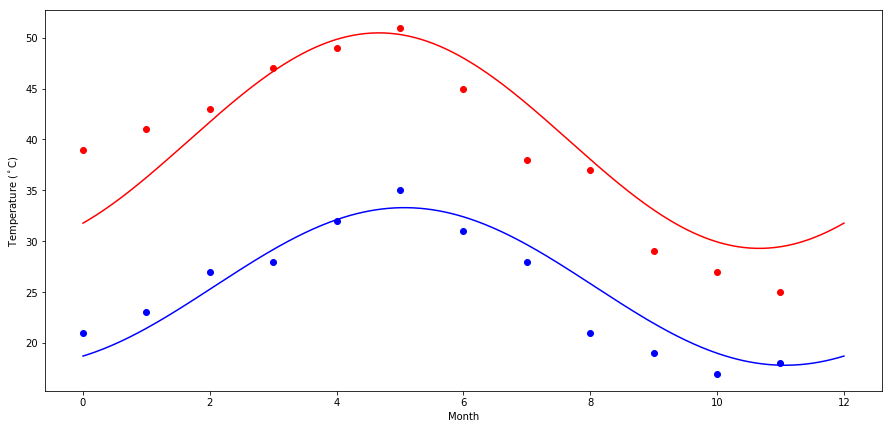

In [21]:
# Plotting the fit
days = np.linspace(0, 12, num=365)
plt.figure(figsize=(15,7))
plt.plot(months, temp_max, 'ro')
plt.plot(days, yearly_temps(days, *res_max), 'r-')
plt.plot(months, temp_min, 'bo')
plt.plot(days, yearly_temps(days, *res_min), 'b-')
plt.xlabel('Month')
plt.ylabel('Temperature ($^\circ$C)')

plt.show()